<a href="https://colab.research.google.com/github/nickystark/GBCI/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import os
import sys
import random
import pandas as pd
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

#Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cloning Directory

In [ ]:
# Clone the repository
!git clone [use our repo_name] # <- replace with the actual repository name

# Change directory to the cloned repository
%cd GBCI

# Install the required dependencies
!pip install -r src/requirements.txt

# Repository dependecies
sys.path.append('/content/GBCI/src')
from train import train_image_generation, train_risk_prediction
from predict_risk import load_risk_model, predict_birads
from config_tuning import config
from data_loader import MammogramDataset
from compare_model import compare_models
from generate import load_model, generate_image

Cloning into 'GBCI'...
remote: Enumerating objects: 587, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 587 (delta 10), reused 11 (delta 5), pack-reused 561 (from 1)
Receiving objects: 100% (587/587), 33.66 MiB | 12.64 MiB/s, done.
Resolving deltas: 100% (350/350), done.
/content/GBCI
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.6 MB/s eta 0:00:00
  Attempting uni

#Datalaoder

In [4]:
compressed_dataset = '/content/drive/MyDrive/DATASET-BREAST_CANCER/VINDR-MAMMO_DATASET.zip'

dataset = MammogramDataset(compressed_dataset)

# Show samples
'''
num_sample = 10
for i in range(num_sample):
  sample = dataset[random.randint(0, len(dataset)-1)]
  MammogramDataset.show_sample(sample)
  '''

'\nnum_sample = 10\nfor i in range(num_sample):\n  sample = dataset[random.randint(0, len(dataset)-1)]\n  MammogramDataset.show_sample(sample)\n  '

#Training

In [5]:
train_loader, test_loader = MammogramDataset.get_data_loaders(
    compressed_dataset,
    batch_size=8,
)

items = 512
partial_train_loader = []
train_iter = iter(train_loader)
for _ in range(items):
    try:
        partial_train_loader.append(next(train_iter))
    except StopIteration:
        break

category_list = train_loader.dataset.category_list # It speficies the categories of 'anomaly' in the Mammography

# Generation Training
train_image_generation(partial_train_loader, category_list)
# Risk Prediction Training
train_risk_prediction(partial_train_loader)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 236MB/s]


[ImageGen] Starting epoch 1/150
[ImageGen] Epoch [1/150], Loss: 1.0230
[ImageGen] Starting epoch 2/150
[ImageGen] Epoch [2/150], Loss: 0.6795
[ImageGen] Starting epoch 3/150
[ImageGen] Epoch [3/150], Loss: 0.6006
[ImageGen] Starting epoch 4/150
[ImageGen] Epoch [4/150], Loss: 0.5286
[ImageGen] Starting epoch 5/150
[ImageGen] Epoch [5/150], Loss: 0.4719
[ImageGen] Starting epoch 6/150
[ImageGen] Epoch [6/150], Loss: 0.4253
[ImageGen] Starting epoch 7/150
[ImageGen] Epoch [7/150], Loss: 0.4034
[ImageGen] Starting epoch 8/150
[ImageGen] Epoch [8/150], Loss: 0.3646
[ImageGen] Starting epoch 9/150
[ImageGen] Epoch [9/150], Loss: 0.3442
[ImageGen] Starting epoch 10/150
[ImageGen] Epoch [10/150], Loss: 0.3229
[ImageGen] Starting epoch 11/150
[ImageGen] Epoch [11/150], Loss: 0.3099
[ImageGen] Starting epoch 12/150
[ImageGen] Epoch [12/150], Loss: 0.2994
[ImageGen] Starting epoch 13/150
[ImageGen] Epoch [13/150], Loss: 0.2874
[ImageGen] Starting epoch 14/150
[ImageGen] Epoch [14/150], Loss: 0.2

Absolutely! Here’s a set of **synthetic, project-specific Q&A** tailored to your actual pipeline and codebase:

---

### 1. **Theory & Model Choice**
**Q:** Why did you choose a latent diffusion model over GANs or VAEs?  
**A:** Latent diffusion combines the stable encoding of VAEs with the high-fidelity generation of diffusion models, avoiding GAN instability and VAE blurriness.

**Q:** Why operate in latent space instead of pixel space?  
**A:** Working in latent space reduces computational cost and memory usage, and allows for faster, high-resolution image synthesis.

---

### 2. **Architecture**
**Q:** How do you condition the image generation?  
**A:** We fuse features from a ViT-encoded masked image, an anatomical attribute embedder, and the encoder’s latent vector using cross-attention within a transformer-based denoising module.

**Q:** Is there a FiLM layer or cycle-consistency loss in your model?  
**A:** No, our model does not use FiLM layers or cycle-consistency loss; conditioning is achieved via cross-attention.

**Q:** Why did you use a transformer for denoising instead of a UNet?  
**A:** The transformer allows for more flexible and explicit multimodal fusion via cross-attention, which is beneficial for integrating diverse conditioning information.

---

### 3. **Conditioning & Attributes**
**Q:** How are attributes incorporated into the model?  
**A:** Attributes are embedded into a vector using a linear layer and then fused with image features through cross-attention in the transformer.

**Q:** What types of attributes are used?  
**A:** We use anatomical and clinical attributes such as breast density, view, category, BIRADS score, side, and ROI coordinates.

---

### 4. **Training & Evaluation**
**Q:** How is the model trained and evaluated?  
**A:** The model is trained on patient-level splits of the VinDr-Mammo dataset, using SSIM and PSNR as primary evaluation metrics.

**Q:** What optimizer and learning rate schedule do you use?  
**A:** We use the Adam optimizer with a fixed learning rate.

---

### 5. **Results & Extensions**
**Q:** How do you ensure the generated images are realistic and diverse?  
**A:** The diffusion process inherently preserves diversity, and we evaluate image quality using SSIM and PSNR.

**Q:** Can this framework be extended to classification or segmentation?  
**A:** Yes, the modular design allows for easy extension to classification or segmentation tasks in future work.

---

### 6. **Clinical & Ethical**
**Q:** How do you address privacy concerns with synthetic images?  
**A:** The latent encoding and diffusion process remove patient-identifiable details, reducing the risk of privacy leakage.

**Q:** How could radiologists use these synthetic images?  
**A:** As supplemental training data, for rare case simulation, and for model explainability studies.

---

Let me know if you want to add or adapt any question for your audience!

##Evaluation

In [6]:
model_paths = {
   # "Baseline Model": "./models/baseline.pth",
    "Epoch 150": "./models/model_epoch150.pth",
}

# Evaluation
results = compare_models(model_paths, test_loader)

# Print results
for label, metrics in results.items():
    print(f"Model: {label}")
    print(f"\tAverage SSIM: {metrics['SSIM']:.4f}")
    print(f"\tAverage PSNR: {metrics['PSNR']:.2f} dB")

Model: Epoch 150
	Average SSIM: 0.8459
	Average PSNR: 22.50 dB


##Generation

Image generated and saved as generated_conditioned.jpg


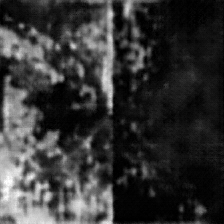

In [7]:
# One sample from test_loader
sample = next(iter(test_loader))
# image = sample["image"]
attributes = sample["attributes"][0:1]      # [1, attr_dim]

# model
model_path = "./models/model_epoch150.pth"
model = load_model(model_path, compressed_dataset)

# Generate the image from conditioning attributes
output_tensor = generate_image(model, attributes) #, image)

# Save and Plot
out_image = ToPILImage()(output_tensor.squeeze(0).clamp(0, 1))
out_image.save("generated_conditioned.jpg")
print("Image generated and saved as generated_conditioned.jpg")

out_image

#Risk Prediction

In [8]:
# Load risk prediction model
risk_model_path = "./models/risk_predictor_epoch150.pth"
risk_model = load_risk_model(risk_model_path, num_birads=6, attr_dim=1, embed_dim=128)

# One sample from test_loader
sample = next(iter(test_loader))

correct = 0
total = 0
# Predizione su tutto il batch
for sample in test_loader:
    images = sample["image"]                  # [batch, 1, 224, 224]
    attributes = sample["attributes"][:, :1]  # [batch, 1] (solo densità)
    true_birads = sample["attributes"][:, 3]  # [batch]
    batch_size = images.shape[0]
    for i in range(batch_size):
        image_i = images[i:i+1]               # [1, 1, 224, 224]
        attr_i = attributes[i:i+1]            # [1, 1]
        true_birads_i = true_birads[i].item()
        pred_birads = predict_birads(risk_model, image_i, attr_i)
        print(f"BIRADS predicted: {pred_birads}, BIRADS truth: {true_birads_i}")
        correct += (pred_birads == true_birads_i)
        total += 1
print(f"Accuracy risk prediction: {(correct/total)*100:.4f}%")

BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 4
BIRADS predicted: 1, BIRADS truth: 3
BIRADS predicted: 1, BIRADS truth: 3
B